# Exploratory Data Analysis

**Dataset:** https://www.kaggle.com/datasets/behrad3d/nasa-cmaps/data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

**Defining features names**

    1 - unit number
    2 - time, in cycles
    3 - operational setting 1
    4 - operational setting 2
    5 - operational setting 3
    6 - sensor measurement 1
    7 - sensor measurement 2
       ...
    26 - sensor measurement 21

where:

    's_1': '(Fan inlet temperature) (◦R)',
    's_2': '(LPC outlet temperature) (◦R)',
    's_3': '(HPC outlet temperature) (◦R)',
    's_4': '(LPT outlet temperature) (◦R)',
    's_5': '(Fan inlet Pressure) (psia)',
    's_6': '(bypass-duct pressure) (psia)',
    's_7': '(HPC outlet pressure) (psia)',
    's_8': '(Physical fan speed) (rpm)',
    's_9': '(Physical core speed) (rpm)',
    's_10': '(Engine pressure ratio(P50/P2)',
    's_11': '(HPC outlet Static pressure) (psia)',
    's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
    's_13': '(Corrected fan speed) (rpm)',
    's_14': '(Corrected core speed) (rpm)',
    's_15': '(Bypass Ratio) ',
    's_16': '(Burner fuel-air ratio)',
    's_17': '(Bleed Enthalpy)',
    's_18': '(Required fan speed)',
    's_19': '(Required fan conversion speed)',
    's_20': '(High-pressure turbines Cool air flow)',
    's_21': '(Low-pressure turbines Cool air flow)'

In [2]:
index_names = ['id', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

FD001 subset corresponds to HPC failure of the engine. It contains time series of 21 sensors and 3 settings of 100 units(turbofan engine). Each engine works normally at the beginning of each time series and fails at the end of the time series. Each row is a snapshot of the data taken during a single operation cycle.

In [3]:
df = pd.read_csv("../dataset/CMaps/train_FD001.txt",sep='\s+',header=None,index_col=False,names=col_names)
print(df.shape)
df.sample(3)

(20631, 26)


,id,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
19364,95,96,0.0000,-0.0002,100.0,518.67,642.34,1591.09,1404.42,14.62,...,522.40,2388.02,8152.24,8.3689,0.03,394,2388,100.0,39.00,23.4466
19114,94,104,0.0009,0.0004,100.0,518.67,643.01,1592.07,1405.21,14.62,...,520.98,2388.12,8132.80,8.4400,0.03,393,2388,100.0,38.73,23.3792
920,5,74,-0.0050,-0.0002,100.0,518.67,642.05,1576.18,1403.57,14.62,...,523.04,2387.98,8149.65,8.3815,0.03,393,2388,100.0,39.00,23.4514


In [4]:
df = df.sort_values(['id','time_cycles'])
df.head(3)

,id,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442


**Cheking the presence of Nan values**

In [5]:
print('Total None values in the train dataset : ',df.isna().sum())

Total None values in the train dataset :  id             0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64


**Adding RUL column**

In [6]:
rul = pd.DataFrame(df.groupby('id')['time_cycles'].max()).reset_index()
rul.columns = ['id', 'max']
df = df.merge(rul, on=['id'], how='left')
df['RUL'] = df['max'] - df['time_cycles']
df.drop('max', axis=1, inplace=True)
df.sample(3)

,id,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
10652,54,123,-0.0022,-0.0003,100.0,518.67,642.24,1590.11,1397.40,14.62,...,2388.05,8145.18,8.3968,0.03,391,2388,100.0,39.02,23.3360,134
18748,92,234,0.0026,0.0001,100.0,518.67,642.83,1595.99,1414.43,14.62,...,2388.12,8151.86,8.4912,0.03,394,2388,100.0,38.86,23.2650,107
15242,76,84,0.0007,-0.0002,100.0,518.67,642.86,1581.31,1407.42,14.62,...,2388.12,8128.22,8.4480,0.03,392,2388,100.0,38.73,23.3365,126


### Data visualization

**Max time cycle found for each Unit**

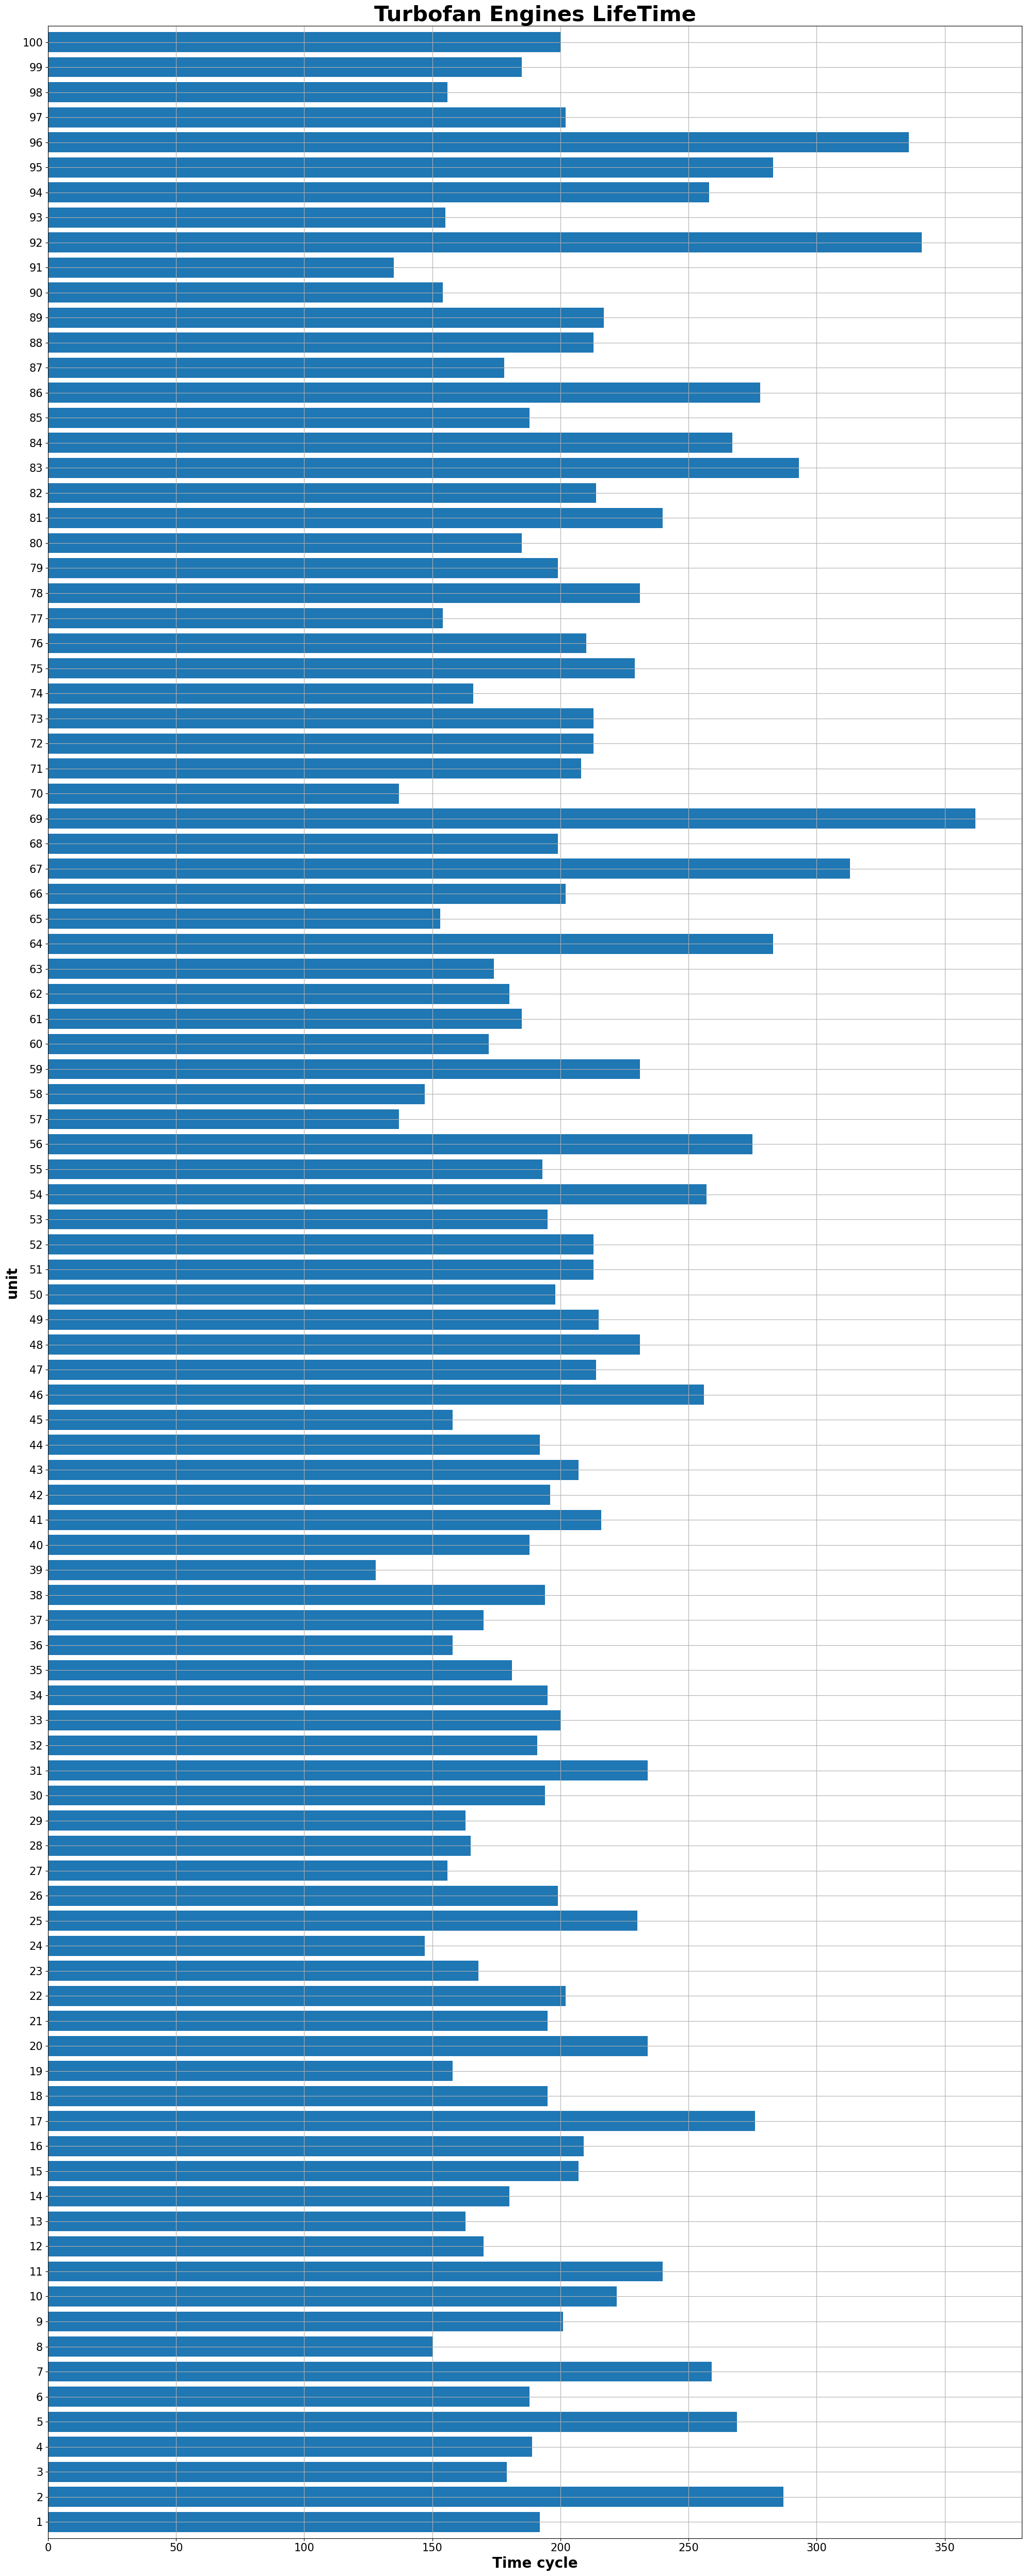

In [7]:
max_time_cycles=df[index_names].groupby('id').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

**Correlation matrix of the features**

<AxesSubplot:>

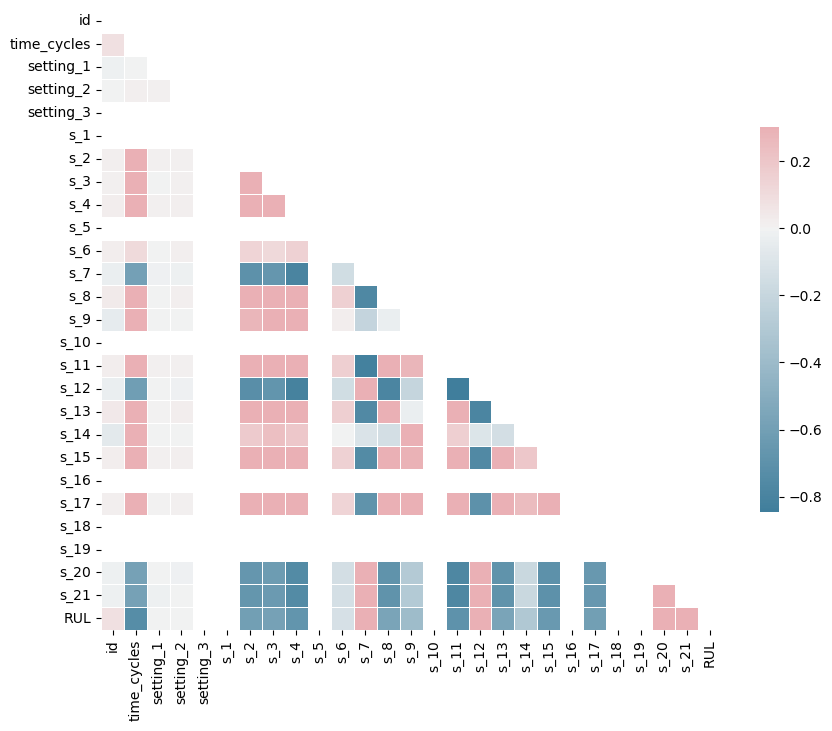

In [8]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Plotting the evolution of features (sensors) along with the evolution with RUL**

In [9]:
Sensor_dictionary={}
dict_list=["(Fan inlet temperature) (◦R)",
    "(LPC outlet temperature) (◦R)",
    "(HPC outlet temperature) (◦R)",
    "(LPT outlet temperature) (◦R)",
    "(Fan inlet Pressure) (psia)",
    "(bypass-duct pressure) (psia)",
    "(HPC outlet pressure) (psia)",
    "(Physical fan speed) (rpm)",
    "(Physical core speed) (rpm)",
    "(Engine pressure ratio(P50/P2)",
    "(HPC outlet Static pressure) (psia)",
    "(Ratio of fuel flow to Ps30) (pps/psia)",
    "(Corrected fan speed) (rpm)",
    "(Corrected core speed) (rpm)",
    "(Bypass Ratio) ",
    "(Burner fuel-air ratio)",
    "(Bleed Enthalpy)",
    "(Required fan speed)",
    "(Required fan conversion speed)",
    "(High-pressure turbines Cool air flow)",
    "(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1

In [10]:
def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['id'].unique():
        if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot(df[df['id']==i].rolling(10).mean()['RUL'].values, df[df['id']==i].rolling(10).mean()[signal_name].values)

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic[signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.show()

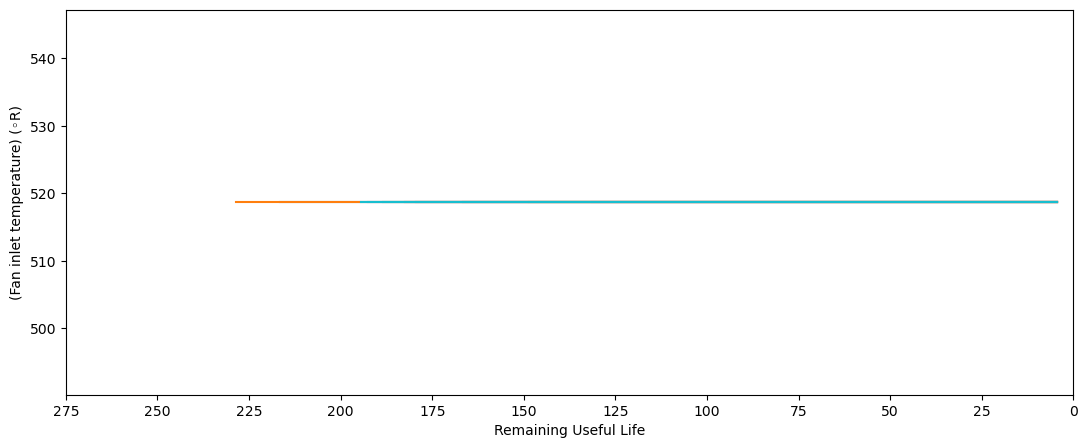

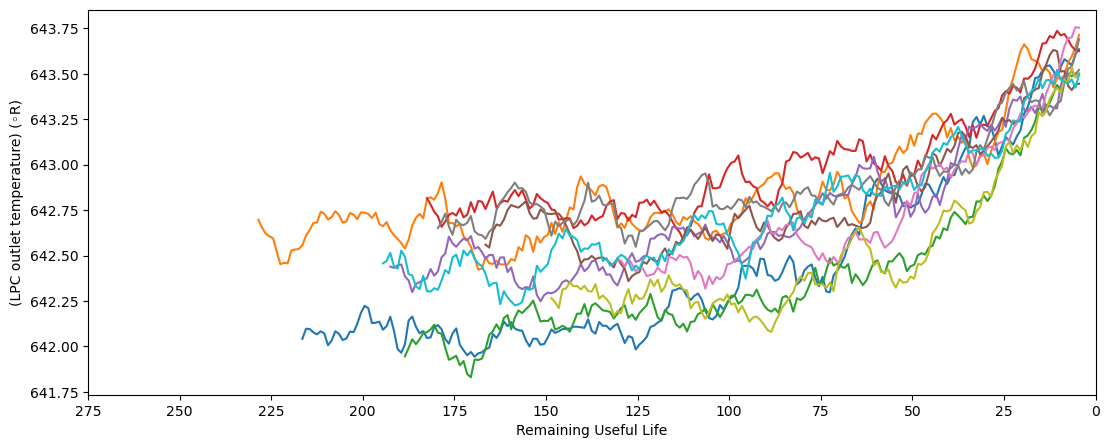

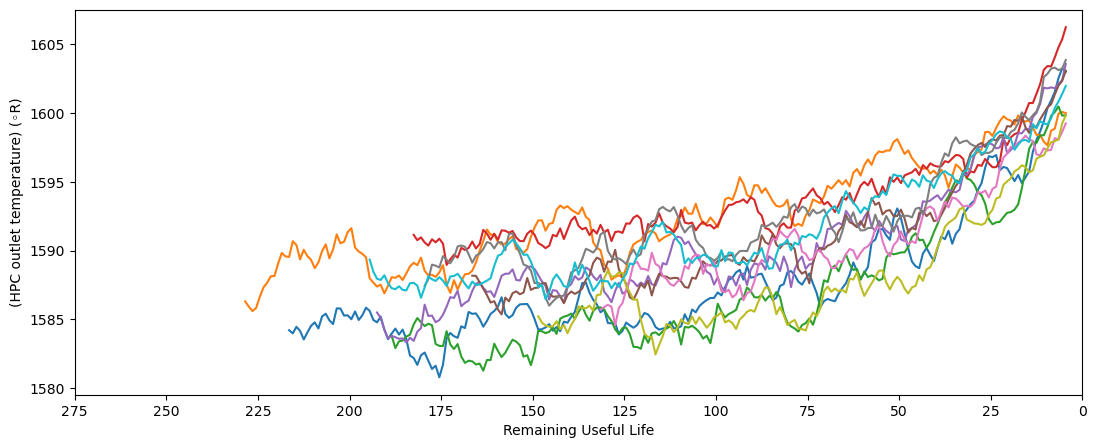

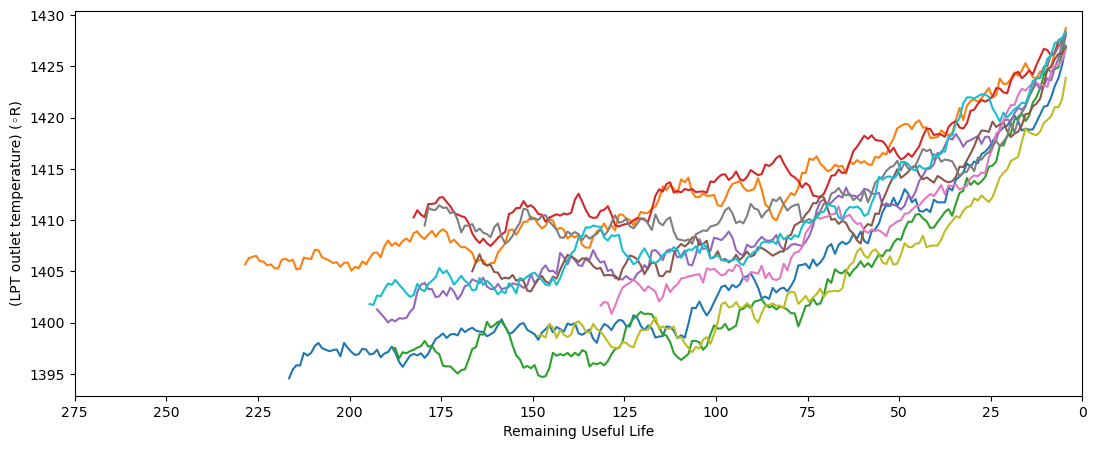

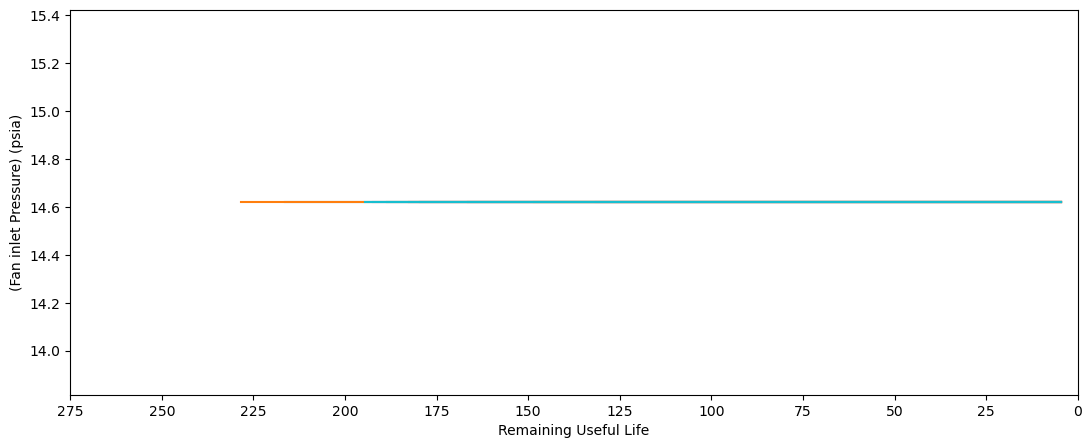

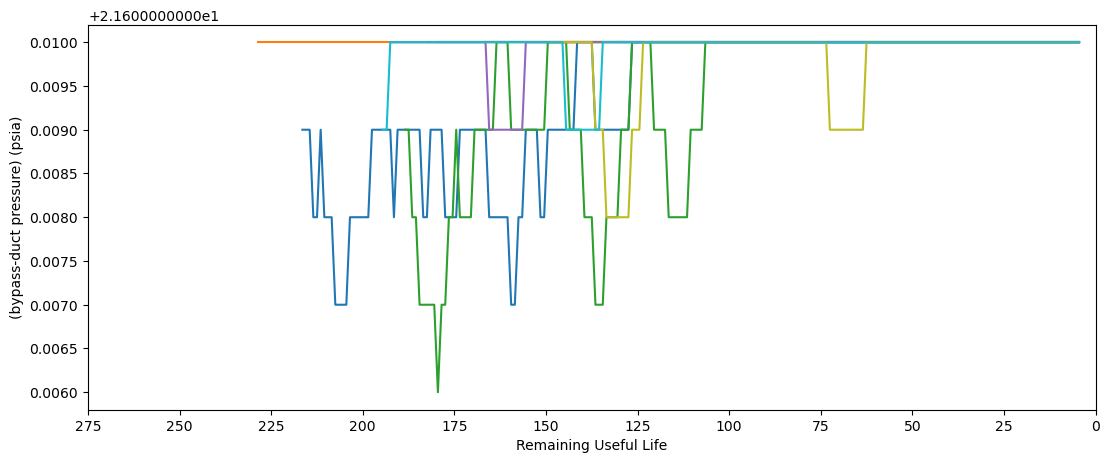

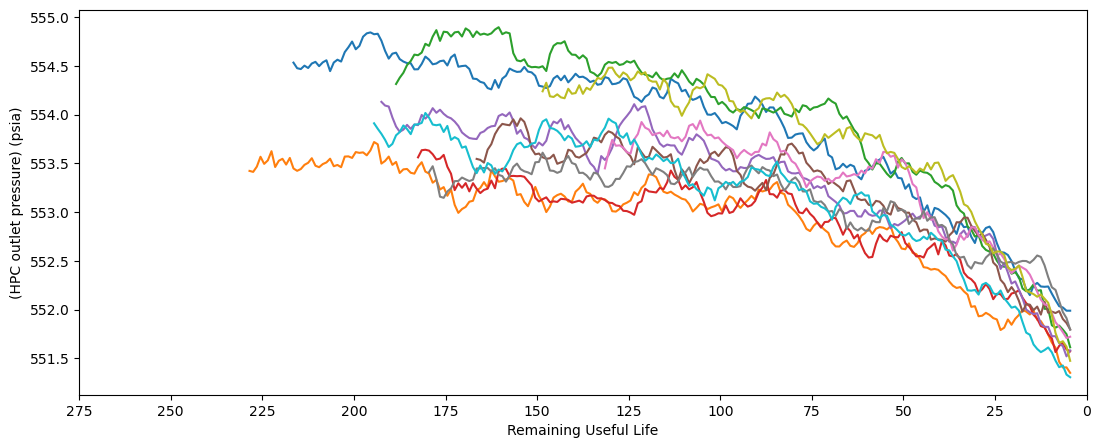

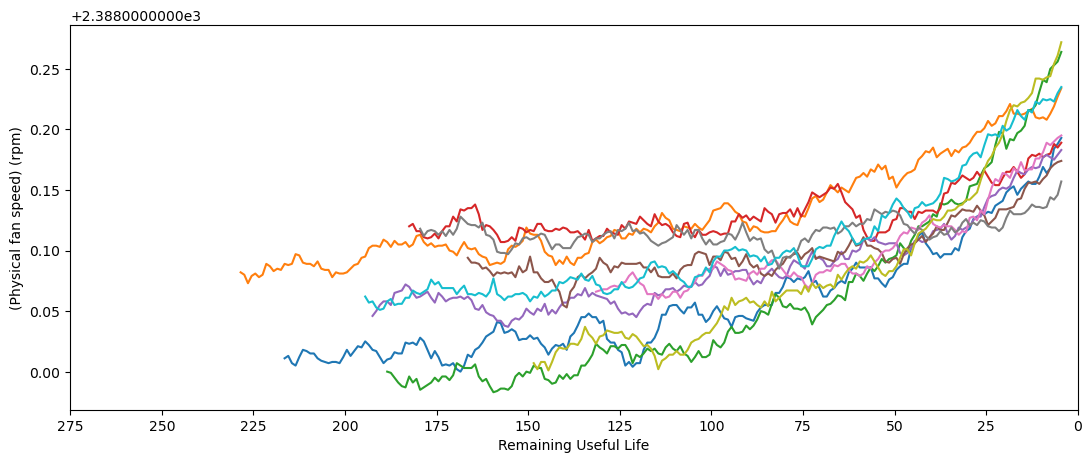

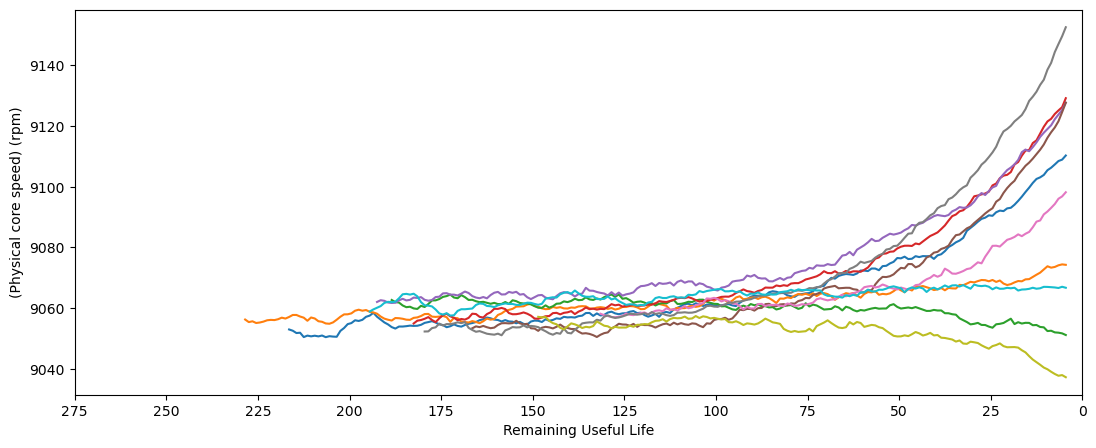

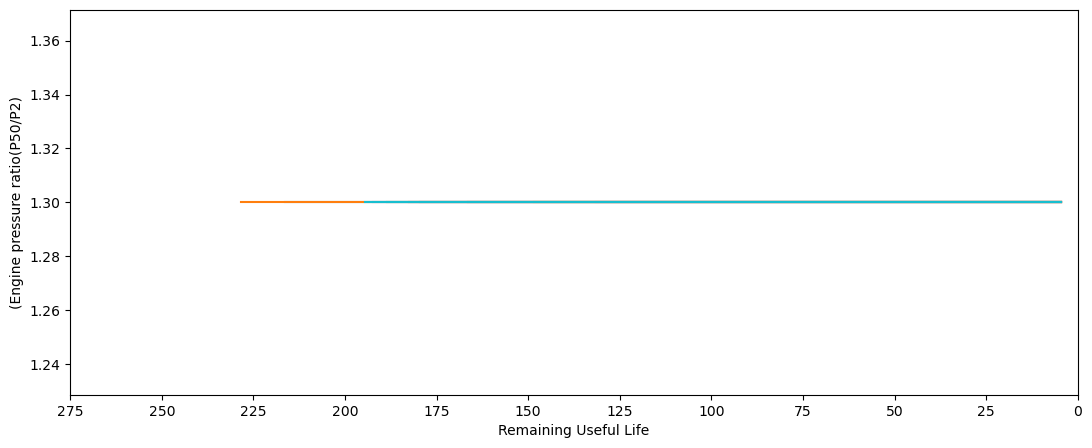

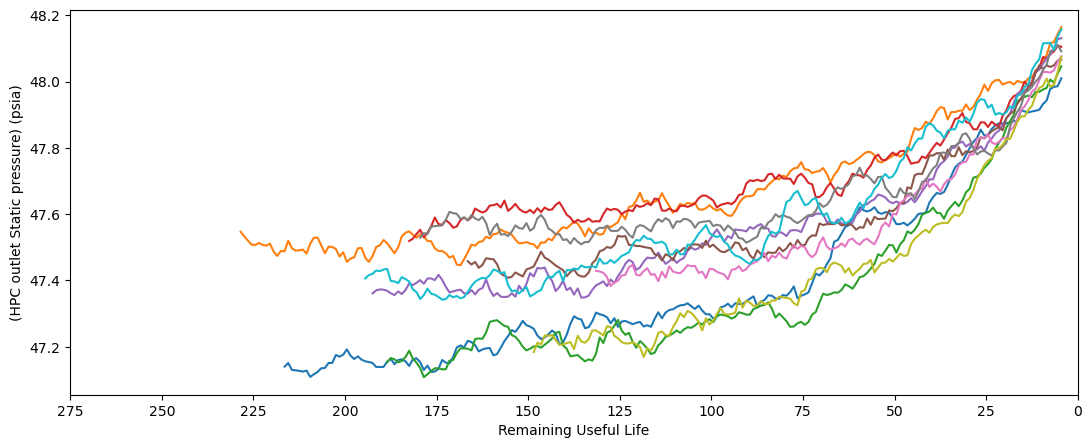

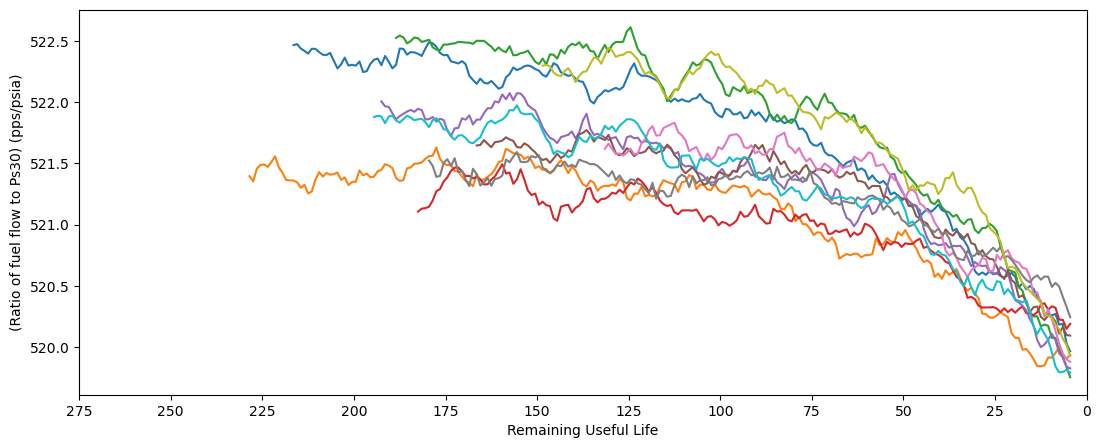

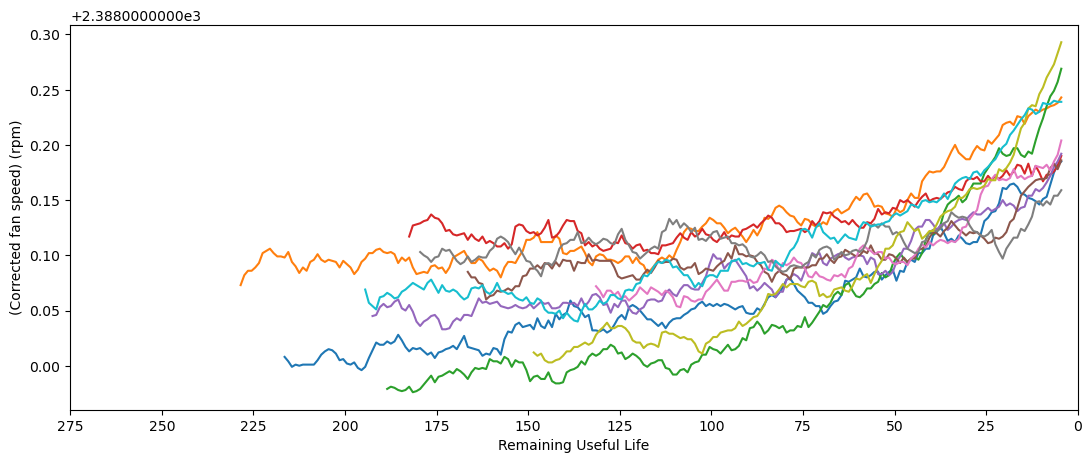

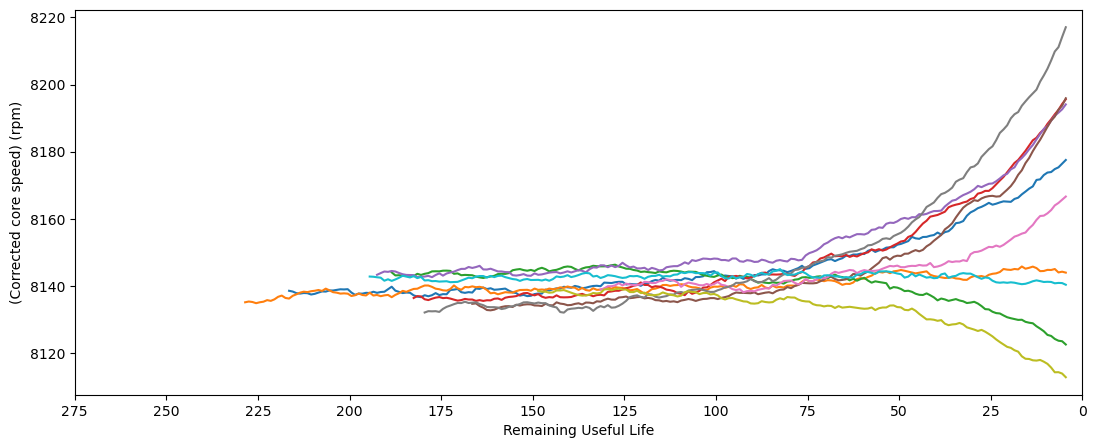

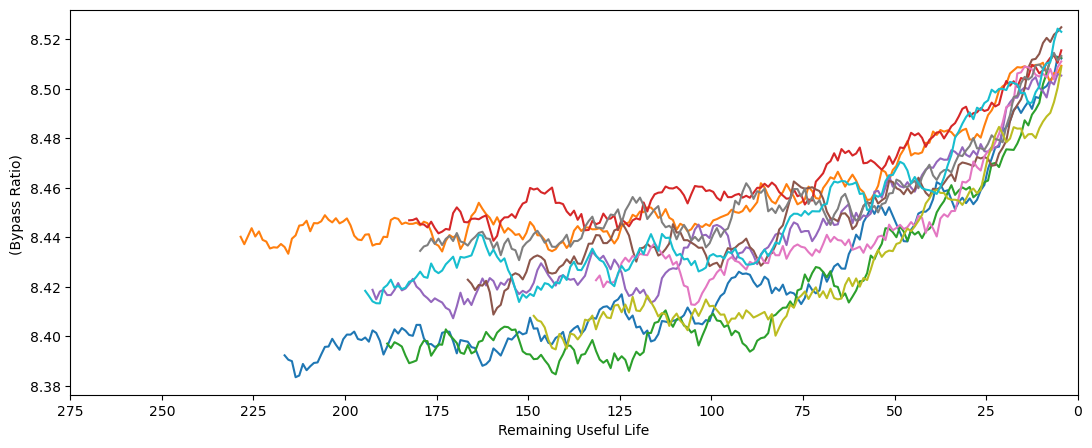

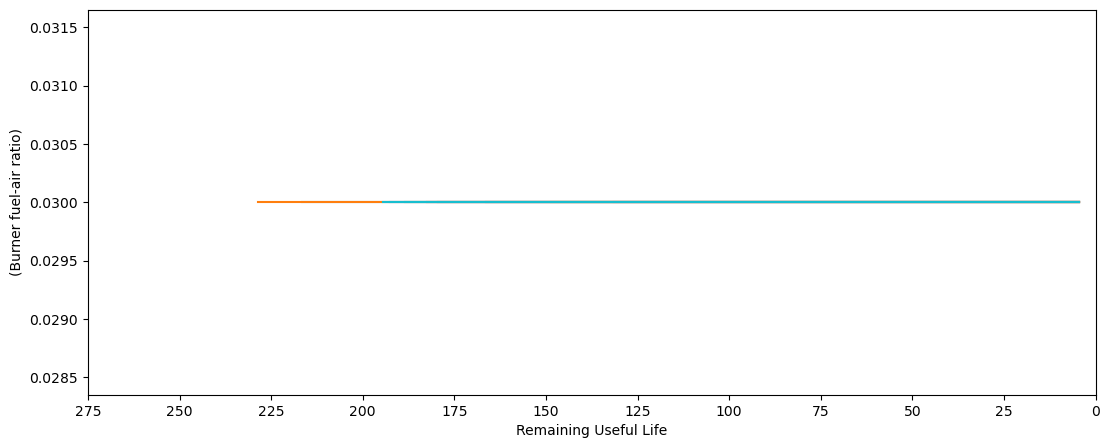

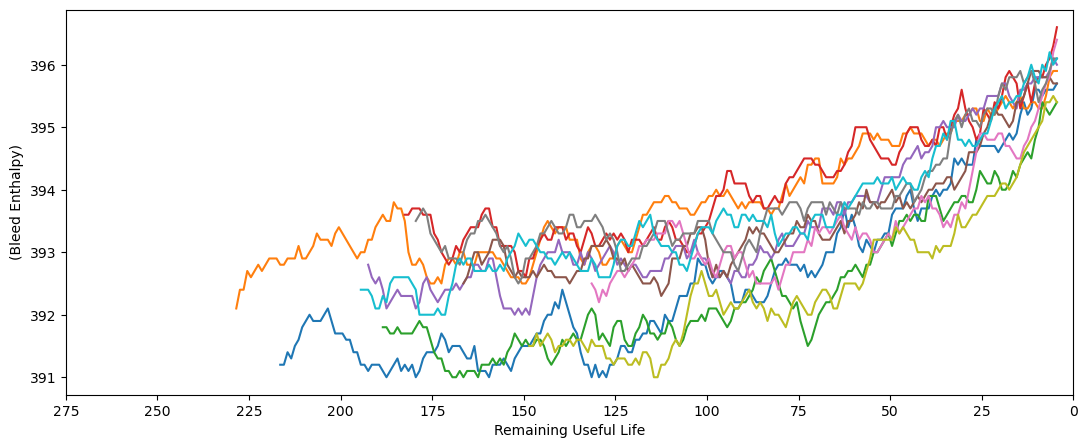

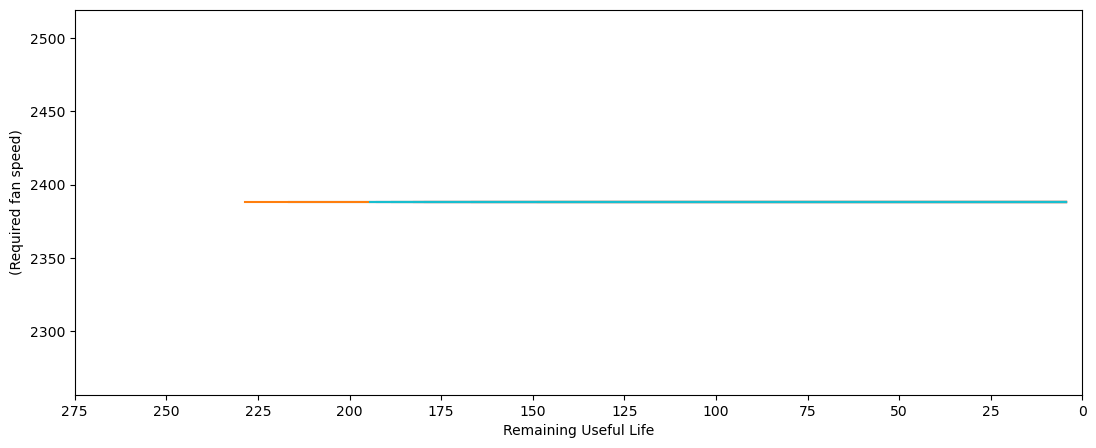

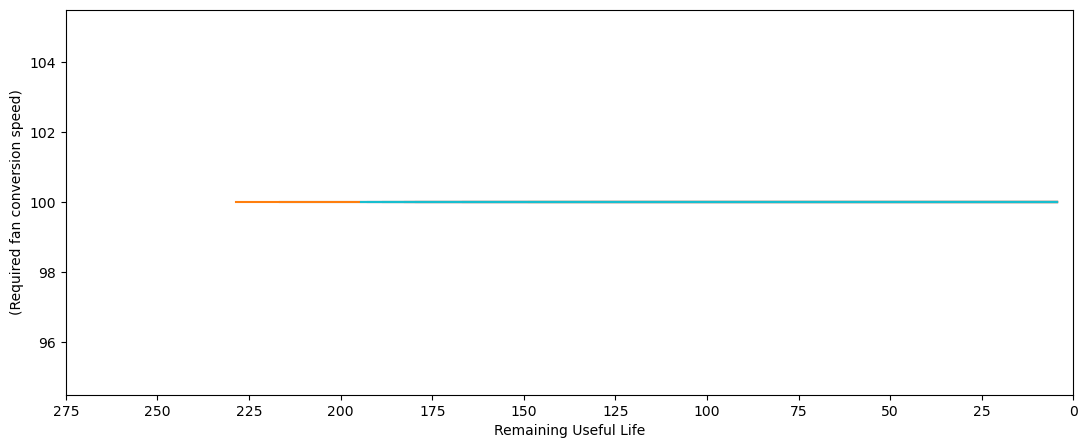

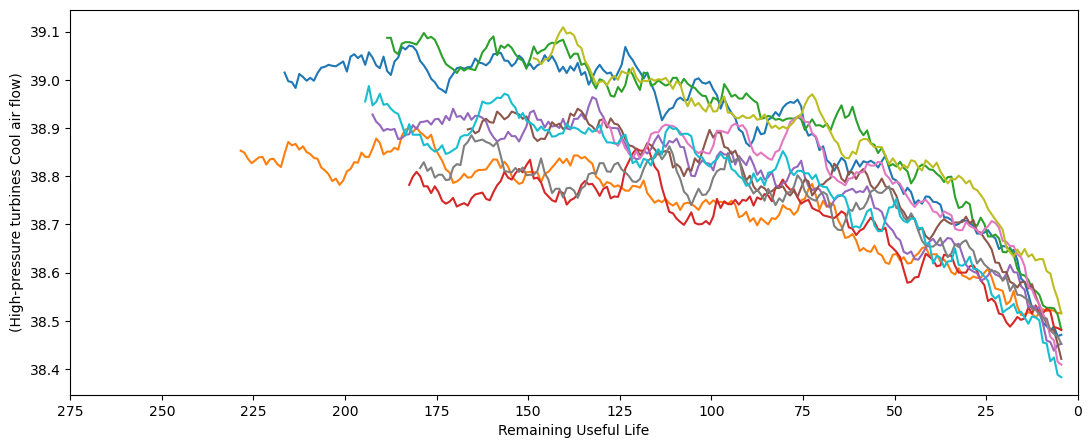

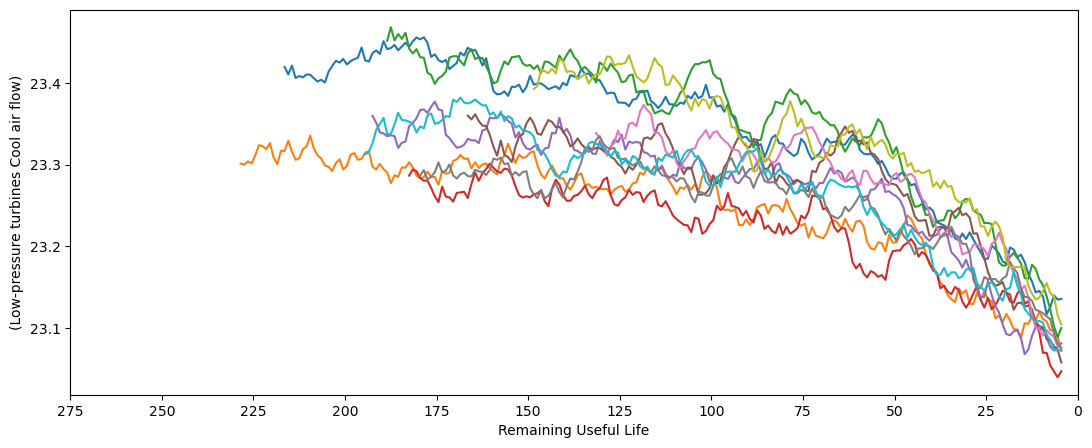

In [11]:
for i in range(1,22):
    try:
        plot_signal(df, Sensor_dictionary,'s_'+str(i))
    except:
        pass

These plots show that some sensors are constant or does not show a tendency behaviour. Hence they don't influence the RUL ==> we can drop those ones.